1. Identify the column names and their data type.
2. Analyse the business requirement.
3. Cleaning the data.
4. Treatment of null values.
5. Variable Transformation.
6. Outlier Treatment.
7. Skewness
8. Data Visualization

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('weather.xlsx')

In [3]:
data

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [5]:
data['temperature'].mean()

33.2

In [7]:
data['temperature'].isnull().sum()

4

In [8]:
(data['temperature'].isnull().sum()) / len(data['temperature'])*100

44.44444444444444

**to treat the null values for the temperature columns, we will be taking the approach of FFill technique**

In [9]:
data['windspeed'].mean()

8.4

**For null values**

1. If null percentage is <3% ===. use dropna
2. If null percentage is >3 - <=40% --> use fill-na
3. If null percentage is > 40% then use ==> drop

**outlier detection**

In [11]:
height_df = pd.DataFrame({
    'name':['mohan','mira','sakib','tao',
           'virat','khushbu','dimitry','selena','john',
           'imran','jose','deepika','joseph','vinod','gulshan',
           'jhonson','amir','ken','leo'],
    
    'height':[1.2,2.3,4.9,5.1,5.2,5.4,5.5,5.6,5.6,5.6,5.9,6.0,6.2,6.3,6.4,7.1,14.5,23.2,40.2]
})

In [12]:
height_df

,name,height
0,mohan,1.2
1,mira,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khushbu,5.4
6,dimitry,5.5
7,selena,5.6
8,john,5.6
9,imran,5.6


In [14]:
q1 = height_df['height'].quantile(0.25)

In [15]:
q1

5.300000000000001

In [16]:
q3 = height_df['height'].quantile(0.75)

In [17]:
q3

6.35

In [18]:
iqr = q3-q1

In [19]:
iqr

1.049999999999999

In [20]:
lower_limit_outlier = q1-1.5*iqr

In [21]:
lower_limit_outlier

3.7250000000000023

In [22]:
upper_limit_outlier = q3+1.5*iqr

In [23]:
upper_limit_outlier

7.924999999999998

In [24]:
outlier_data = height_df[(height_df['height']<=lower_limit_outlier) | (height_df['height'] >=upper_limit_outlier)]

In [25]:
outlier_data

,name,height
0,mohan,1.2
1,mira,2.3
16,amir,14.5
17,ken,23.2
18,leo,40.2


In [8]:
dic = {
    'name':['Mohan','Raj','Rahul','Ajay','Alex','Alok','Ria','Zach','Akshay',
           'John','Jason','Tia','Khushi','Avni','Pihu','Joel','Justin','Heena','Shilpa','Andy'],
    
    'height' : [1.2,2.3,4.0,5.1,4.9,5.6,5.6,6.1,6.4,5.8,5.7,6.0,6.2,6.4,6.5,7.1,14.5,23.2,30.3,40.1]
}

In [9]:
len(dic['height'])

20

In [10]:
df = pd.DataFrame(dic)

In [11]:
df

,name,height
0,Mohan,1.2
1,Raj,2.3
2,Rahul,4.0
3,Ajay,5.1
4,Alex,4.9
5,Alok,5.6
6,Ria,5.6
7,Zach,6.1
8,Akshay,6.4
9,John,5.8


In [12]:
q1 = df['height'].quantile(0.25)

In [13]:
q1

5.475

In [15]:
q3 = df['height'].quantile(0.75)

In [16]:
q3

6.65

In [17]:
iqr = q3-q1

In [18]:
iqr

1.1750000000000007

In [19]:
lower_limit_outlier = q1-1.5*iqr

In [20]:
lower_limit_outlier

3.7124999999999986

In [21]:
upper_limit_outlier = q3+1.5*iqr

In [22]:
upper_limit_outlier

8.412500000000001

In [24]:
outlier_data = df[(df['height'] < lower_limit_outlier) | (df['height'] > upper_limit_outlier)]

In [25]:
outlier_data

,name,height
0,Mohan,1.2
1,Raj,2.3
16,Justin,14.5
17,Heena,23.2
18,Shilpa,30.3
19,Andy,40.1


**using std**

In [26]:
df2 = pd.read_csv('height_weight.csv')

In [27]:
df2

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [31]:
mean_height = df2['height'].mean() #mean of height

In [29]:
std_height = df2['height'].std()  #standard deviation.

In [30]:
std_height

3.8475281207732324

**lower limit height**

In [32]:
lower_limit_height = mean_height - 3 * std_height

In [33]:
lower_limit_height

54.82497539250154

In [34]:
upper_limit_height = mean_height + 3 * std_height

In [35]:
upper_limit_height

77.91014411714094

In [36]:
outlier_data_new = df2[(df2['height'] < lower_limit_height) | (df2['height'] > upper_limit_height)]

In [37]:
outlier_data_new

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


**weights**

In [38]:
mean_weight = df2['weight'].mean()

std_weight = df2['weight'].std()

In [39]:
mean_weight

161.44035683283076

In [40]:
std_weight

32.108439006519546

In [41]:
lower_limit_weight = mean_weight - 3 * std_weight
upper_limit_weight = mean_weight + 3 * std_weight
outlier_data_weight = df2[(df2['weight'] < lower_limit_weight) | (df2['weight'] > upper_limit_weight)]

In [42]:
outlier_data_weight

,gender,height,weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


**Z-score**

In [43]:
df2['Z-Score-Height'] = (df2['height']-df2['height'].mean()) / df2['height'].std()

In [44]:
df2

,gender,height,weight,Z-Score-Height
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [45]:
df2['Z-Score-Height'].max()

3.2829344439020995

The Z-Score if > 3 will be considered as an upper limit outlier

The Z-Score if < -3  will be considered as an lower limit outlier

In [46]:
df2[(df2['Z-Score-Height'] <-3) | (df2['Z-Score-Height'] > 3)]

,gender,height,weight,Z-Score-Height
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


**Skewness**

In [47]:
boston_data = pd.read_csv('BostonHousing.csv')

In [48]:
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


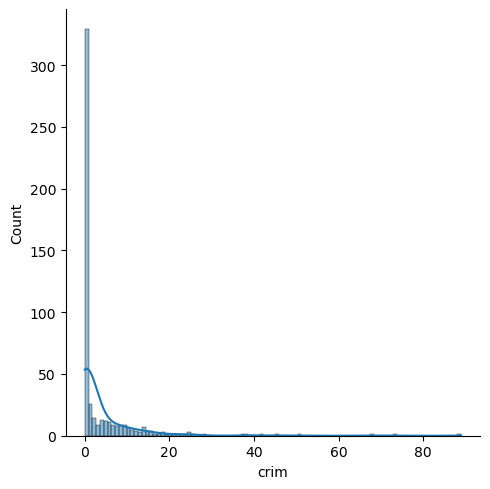

In [51]:
sns.displot(boston_data['crim'],kde=True)

<Axes: xlabel='crim', ylabel='Density'>

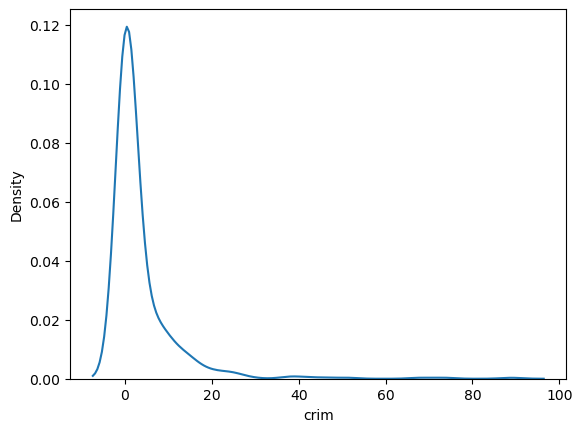

In [52]:
sns.kdeplot(boston_data['crim'])

In [53]:
boston_data['crim'].skew()

5.223148798243851

1. log transformation

2. square root transformation

In [54]:
log_crim = np.log(boston_data['crim'])

In [55]:
log_crim

0     -5.064036
1     -3.600502
2     -3.601235
3     -3.430523
4     -2.672924
         ...   
501   -2.770511
502   -3.095111
503   -2.800824
504   -2.211009
505   -3.048922
Name: crim, Length: 506, dtype: float64

<Axes: xlabel='crim', ylabel='Density'>

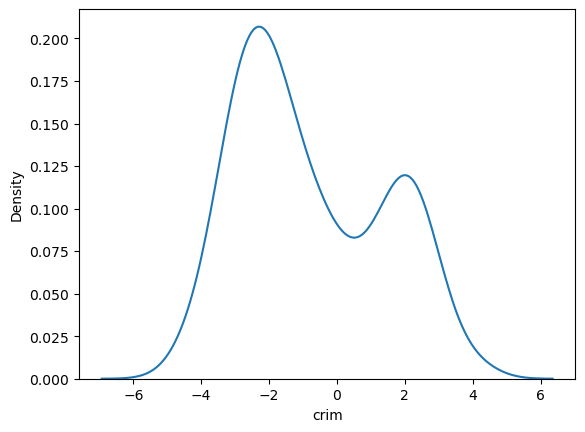

In [56]:
sns.kdeplot(log_crim)

In [57]:
log_crim.skew()

0.4059344988496048

In [58]:
sqrt_transform = np.sqrt(boston_data['crim'])

In [59]:
sqrt_transform

0      0.079498
1      0.165257
2      0.165197
3      0.179917
4      0.262774
         ...   
501    0.250260
502    0.212767
503    0.246495
504    0.331044
505    0.217738
Name: crim, Length: 506, dtype: float64

<Axes: xlabel='crim', ylabel='Density'>

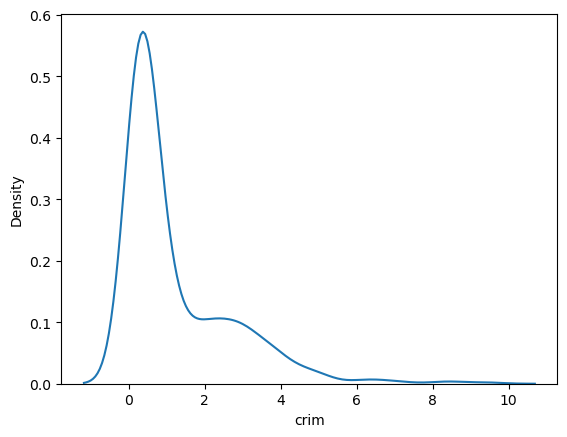

In [60]:
sns.kdeplot(sqrt_transform)

In [61]:
sqrt_transform.skew()

2.024382103123676

**Encoding Techniques**

In [62]:
cars_df = pd.read_csv('cars.csv')

In [63]:
cars_df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [74]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.1+ KB


In [68]:
cars_df['normalized-losses'].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [67]:
cars_df['normalized-losses'].replace("?",np.nan,inplace=True)

In [70]:
cars_df['normalized-losses'] = cars_df['normalized-losses'].astype(float)

In [73]:
cars_df['normalized-losses'] = cars_df['normalized-losses'].fillna(cars_df['normalized-losses'].mean())